# Playing Around...

### WeTransfer download link:
*https://wetransfer.com/downloads/72619a02a0250f28c7d507d98a513b3520231014201152/898b33b5b0f0be38cb6328f4271c5ac920231014201209/c1f7a2*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
# First initialize a variable to hold the dataframe path (relative to the VSCode workspace): 
# /data/ff-mw.pkl, where data is a folder in the root directory so need to go up one level
df_path = '../data/ff-mw.pkl'

# Load in the dataframe with relative file path: data/ff-mw.pkl
df = pd.read_pickle(df_path)

# Drop the plot column
df = df.drop('plot', axis = 1)

# Get the column names
cols = df.columns.tolist()

# Rearrange the column names
cols.insert(cols.index('F2Wdis') + 1, cols.pop(cols.index('F2Wdis_rate')))
# cols.pop does the following:
# cols.index('F2Wdis') returns the index of 'F2Wdis' in the list cols
# cols.pop(cols.index('F2Wdis')) pops the element at the index of 'F2Wdis' in the list cols
# cols.insert(cols.index('F2Wdis') + 1, cols.pop(cols.index('F2Wdis'))) inserts the element at the index of 'F2Wdis' + 1 in the list cols

# Reindex the DataFrame with the new column order
df = df[cols]

# Calculating the mean of the 'ANTdis_1', 'ANTdis_2 vars
# Each wasp has two antennas, and ANTdis_x is the displacement between the two antennas 
# 'ANTdis_1' 
df['ANTdis'] = df[['ANTdis_1', 'ANTdis_2']].mean(axis=1)

## Adding the label
# create new variable 'start_walk'
df['start_walk'] = ((df['walk_backwards'] == 1) & (df['walk_backwards'].shift(1) == 0)).astype(int)

In [3]:
df.head()

,Frame,WCin,WHin,Fdis,FdisF,FdisL,Wdis,WdisF,WdisL,Fangle,...,F2W_blob_dis,bp_F_delta,bp_W_delta,ap_F_delta,ap_W_delta,ant_W_delta,file,walk_backwards,ANTdis,start_walk
328,329,1,1,647.424377,259.817659,593.003464,376.272052,80.299278,642.425365,2.233504,...,126.063476,inf,inf,inf,inf,inf,D230430_G01_R23_L02_ani.mat,0,310.479099,0
329,330,1,1,650.029331,256.529583,597.269373,376.268859,82.118727,644.821406,11.022451,...,142.593829,inf,inf,inf,inf,inf,D230430_G01_R23_L02_ani.mat,0,309.159513,0
330,331,1,1,657.561629,258.390046,604.666751,373.864427,84.827768,652.067133,22.131592,...,151.029798,inf,inf,inf,inf,inf,D230430_G01_R23_L02_ani.mat,0,308.368251,0
331,332,1,1,663.569755,265.404763,608.181824,372.052409,84.355983,658.186059,22.377265,...,154.000000,inf,inf,inf,inf,inf,D230430_G01_R23_L02_ani.mat,0,304.856487,0
332,333,1,1,659.618369,262.884849,604.969378,371.772426,80.206714,654.723816,0.900096,...,154.029218,inf,inf,inf,inf,inf,D230430_G01_R23_L02_ani.mat,0,306.651652,0


In [9]:
len(df['file'].value_counts())

136

In [10]:
df['start_walk'].value_counts()

start_walk
0    9784682
1       7318
Name: count, dtype: int64

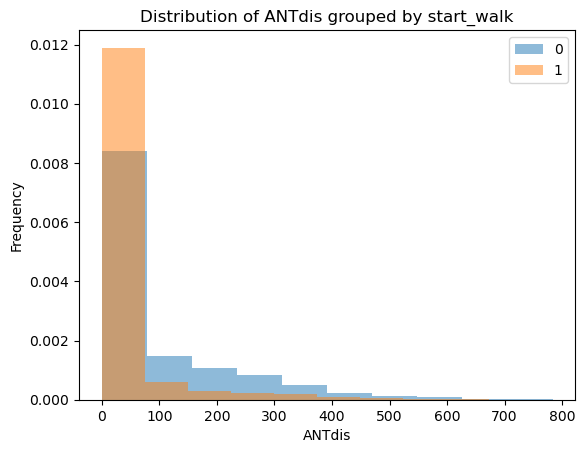

In [12]:
df.groupby('start_walk')['ANTdis'].plot(kind='hist', alpha=0.5, legend=True, density=True)
plt.xlabel('ANTdis')
plt.title('Distribution of ANTdis grouped by start_walk')
plt.show()
